155.58017994747945 112.6574109948771
375.59904577847567 108.5029592946008
563.5524017467249 217.9868995633188
148.0 337.0
440.91484667990295 370.1058901389808


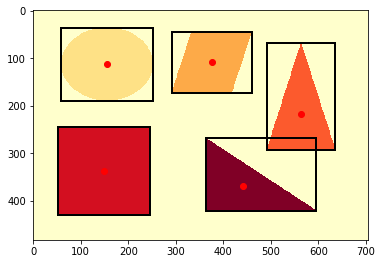

In [2]:
import numpy, math
import scipy.misc
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage.measure  import label
from scipy.misc.pilutil import Image
from skimage.measure import regionprops
from skimage.filters.thresholding import threshold_otsu

# opening the image and converting it to grayscale 
a = Image.open('objects.png').convert('L') 
# a is converted to an ndarray
a = scipy.misc.fromimage(a)
# threshold value is determined by 
# using Otsu's method

thresh = threshold_otsu(a)
# the pixels with intensity greater than 
# theshold are kept
b = a > thresh
# labelling is performed on b
c = label(b)
# c is converted from an ndarray to an image 
c1 = scipy.misc.toimage(c)
# c1 is saved as label_output.png
c1.save('label_output.png')
# on the labelled image c, regionprops is performed

d = regionprops(c)

# the following command creates an empty plot of 
# dimension 6 inch by 6 inch
fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(6, 6))
# plots the label image on the 
# previous plot using colormap  
ax.imshow(c, cmap='YlOrRd')
  
for i in d:
    # printing the x and y values of the
    # centroid where centroid[1] is the x value 
    # and centroid[0] is the y value
    print (i['Centroid'][1],i['Centroid'][0])
    # plot a red circle at the centroid, ro stands
    # for red
    plt.plot(i['Centroid'][1],i['Centroid'][0],'ro')
    # In the bounding box, (lr,lc) are the 
    # co-ordinates of the lower left corner and 
    # (ur,uc) are the co-ordinates 
    # of the top right corner 
    lr, lc, ur, uc = i['BoundingBox']
    # the width and the height of the bounding box
    # is computed
    rec_width = uc - lc
    rec_height = ur - lr
    
    # Rectangular boxes with 
	# origin at (lr,lc) are drawn 
    rect = mpatches.Rectangle((lc, lr),rec_width,
           rec_height,fill=False,edgecolor='black',
           linewidth=2)
    # this adds the rectangular boxes to the plot
    ax.add_patch(rect)
	
# displays the plot
plt.show()
